In [1]:
import os
import librosa
import numpy as np
import pandas as pd

In [2]:
Ravdess = r"C:/Users/chandu/Documents/Major project/audio_speech_actors_01-24/"
Crema = r"C:/Users/chandu/Documents/Major project/AudioWAV/"
Tess = r"C:/Users/chandu/Documents/Major project/TESS Toronto emotional speech set data/"
Savee = r"C:/Users/chandu/Documents/Major project/ALL/"


In [3]:
# Emotion map for each dataset
ravdess_emotions = {
    '01': 'neutral', '02': 'calm', '03': 'happy', '04': 'sad',
    '05': 'angry', '06': 'fearful', '07': 'disgust', '08': 'surprised'
}
crema_emotions = {
    'SAD': 'sad', 'ANG': 'angry', 'DIS': 'disgust', 'FEA': 'fearful',
    'HAP': 'happy', 'NEU': 'neutral'
}
tess_emotions = {
    'angry': 'angry', 'disgust': 'disgust', 'fear': 'fearful',
    'happy': 'happy', 'neutral': 'neutral', 'ps': 'surprised', 'sad': 'sad'
}
savee_emotions = {
    'a': 'angry', 'd': 'disgust', 'f': 'fearful', 'h': 'happy',
    'n': 'neutral', 'sa': 'sad', 'su': 'surprised'
}


In [4]:
# Function to extract MFCC features
def extract_features(file_path, sr=22050, n_mfcc=40):
    try:
        audio, sample_rate = librosa.load(file_path, sr=sr)
        mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
        mfcc_scaled = np.mean(mfcc.T, axis=0)
        return mfcc_scaled
    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None


In [5]:

# Process datasets
data = []

# RAVDESS
for actor in os.listdir(Ravdess):
    actor_path = os.path.join(Ravdess, actor)
    for file in os.listdir(actor_path):
        emotion_code = file.split("-")[2]
        emotion = ravdess_emotions[emotion_code]
        file_path = os.path.join(actor_path, file)
        features = extract_features(file_path)
        if features is not None:
            data.append([features, emotion])

# CREMA-D
for file in os.listdir(Crema):
    emotion_code = file.split('_')[2]
    emotion = crema_emotions.get(emotion_code)
    file_path = os.path.join(Crema, file)
    features = extract_features(file_path)
    if features is not None:
        data.append([features, emotion])

# TESS
for folder in os.listdir(Tess):
    folder_path = os.path.join(Tess, folder)
    for file in os.listdir(folder_path):
        emotion = file.split('_')[-1].split('.')[0].lower()
        emotion = tess_emotions.get(emotion)
        file_path = os.path.join(folder_path, file)
        features = extract_features(file_path)
        if features is not None:
            data.append([features, emotion])

# SAVEE
for file in os.listdir(Savee):
    emotion_code = ''.join([char for char in file if char.isalpha()])
    emotion = savee_emotions.get(emotion_code)
    file_path = os.path.join(Savee, file)
    features = extract_features(file_path)
    if features is not None:
        data.append([features, emotion])

# Convert to DataFrame and save
df = pd.DataFrame(data, columns=['features', 'emotion'])
df.to_pickle('emotion_features.pkl')
print("Data preprocessing completed and saved!")


C:\Users\chandu\AppData\Local\Temp\ipykernel_10200\1991199444.py:4: UserWarning: PySoundFile failed. Trying audioread instead.
  audio, sample_rate = librosa.load(file_path, sr=sr)
C:\Users\chandu\AppData\Roaming\Python\Python311\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error extracting features from C:/Users/chandu/Documents/Major project/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data\OAF_angry: [Errno 13] Permission denied: 'C:/Users/chandu/Documents/Major project/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data\\OAF_angry'
Error extracting features from C:/Users/chandu/Documents/Major project/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data\OAF_disgust: [Errno 13] Permission denied: 'C:/Users/chandu/Documents/Major project/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data\\OAF_disgust'
Error extracting features from C:/Users/chandu/Documents/Major project/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data\OAF_Fear: [Errno 13] Permission denied: 'C:/Users/chandu/Documents/Major project/TESS Toronto emotional speech set data/TESS Toronto emotional speech set data\\OAF_Fear'
Error extracting features from C:/U

In [6]:
df.head()

,features,emotion
0,"[-697.7926, 54.89004, 0.6634652, 12.435786, 7....",neutral
1,"[-692.8558, 55.3639, -1.5483192, 16.038307, 8....",neutral
2,"[-691.5879, 58.024662, 0.15946463, 13.62465, 5...",neutral
3,"[-685.10547, 55.87942, 2.783262, 13.252024, 6....",neutral
4,"[-727.1044, 62.355034, 3.1211812, 15.064671, 8...",calm


In [7]:
df.isnull().sum()

features      0
emotion     480
dtype: int64

In [8]:
df.shape

(12162, 2)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12162 entries, 0 to 12161
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   features  12162 non-null  object
 1   emotion   11682 non-null  object
dtypes: object(2)
memory usage: 190.2+ KB


In [10]:
print(df['emotion'].unique())


['neutral' 'calm' 'happy' 'sad' 'angry' 'fearful' 'disgust' 'surprised'
 None]


In [11]:
print(df['emotion'].value_counts())

emotion
happy        1863
sad          1863
angry        1863
fearful      1863
disgust      1863
neutral      1583
surprised     592
calm          192
Name: count, dtype: int64


In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

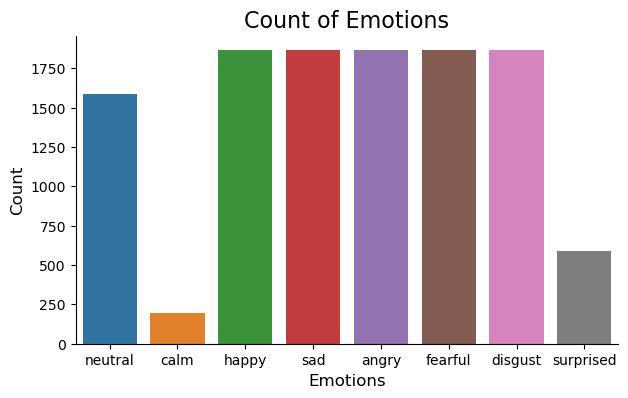

In [13]:
plt.figure(figsize=(7, 4))
plt.title('Count of Emotions', size=16)
sns.countplot(x='emotion', data=df)  
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)
plt.show()


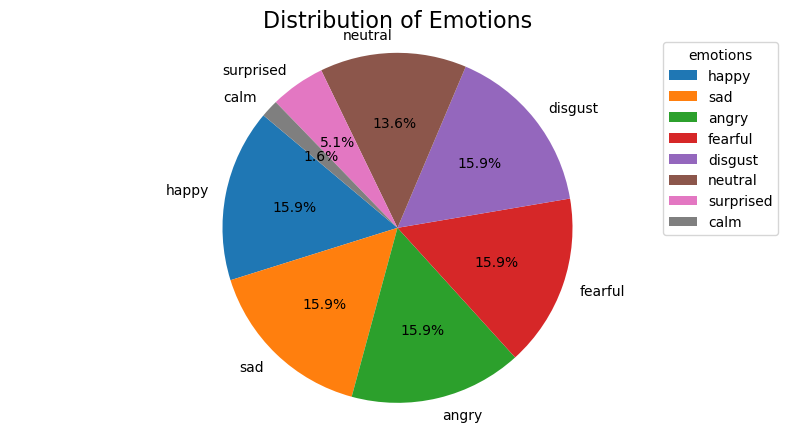

In [14]:
emotion_counts = df['emotion'].value_counts()

# Create a pie chart with automatically generated colors
plt.figure(figsize=(10, 5))
plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribution of Emotions', size=16)
plt.axis('equal') 
plt.legend(emotion_counts.index, title='emotions', loc='upper right')

plt.show()


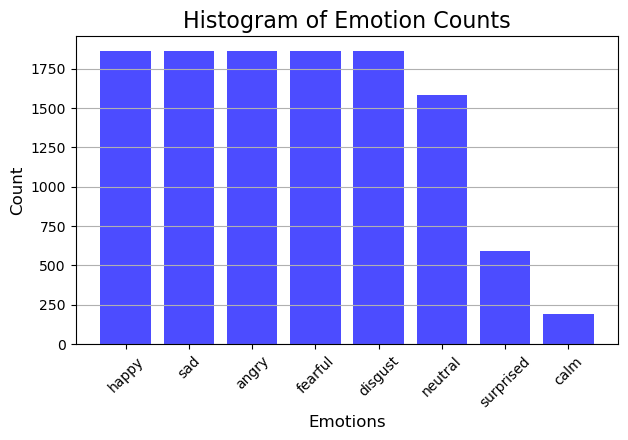

In [15]:
plt.figure(figsize=(7, 4))
plt.bar(emotion_counts.index, emotion_counts.values, color='blue', alpha=0.7)
plt.title('Histogram of Emotion Counts', size=16)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


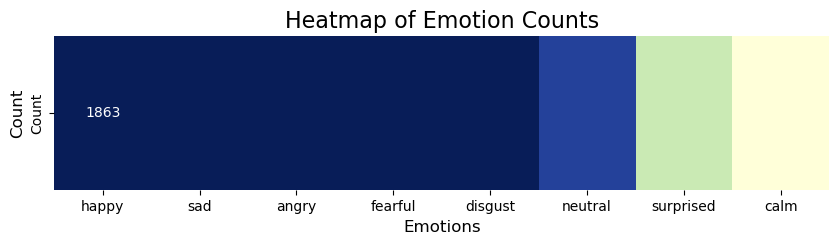

In [16]:
heatmap_data = emotion_counts.values.reshape(1, -1)  # Reshape to 1 row
plt.figure(figsize=(10, 2))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='YlGnBu', cbar=False, 
            xticklabels=emotion_counts.index, yticklabels=['Count'])
plt.title('Heatmap of Emotion Counts', size=16)
plt.xlabel('Emotions', size=12)
plt.ylabel('Count', size=12)
plt.show()


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

df = pd.DataFrame(data, columns=['features', 'emotion'])

# Prepare features (X) and target (y)
X = pd.get_dummies(df.drop('features', axis=1), drop_first=True)  
y = LabelEncoder().fit_transform(df['emotion'])

# Scale features
X = StandardScaler().fit_transform(X)


In [18]:

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train and evaluate model
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)
accuracy = accuracy_score(y_test, model.predict(X_test))

print(f"Random Forest Accuracy: {accuracy * 100:.2f}%")


Random Forest Accuracy: 96.05%


In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Train and evaluate KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)  
knn_model.fit(X_train, y_train)
accuracy_knn = accuracy_score(y_test, knn_model.predict(X_test))

print(f"KNN Model Accuracy: {accuracy_knn * 100:.2f}%")


KNN Model Accuracy: 96.05%


In [20]:
from sklearn.svm import SVC

# Train and evaluate SVM model
svm_model = SVC(kernel='linear', random_state=42)  
svm_model.fit(X_train, y_train)
accuracy_svm = accuracy_score(y_test, svm_model.predict(X_test))

print(f"SVM Model Accuracy: {accuracy_svm * 100:.2f}%")


SVM Model Accuracy: 96.05%


In [21]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense

# Reshape data for 1D CNN
X_train_cnn = X_train[..., None]  # Add channel dimension
X_test_cnn = X_test[..., None]

# Build CNN model
cnn_model = Sequential([
    Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_cnn.shape[1], 1)),
    MaxPooling1D(pool_size=2),
    Flatten(),
    Dense(64, activation='relu'),
    Dense(len(set(y)), activation='softmax')  # Output layer for multi-class classification
])

# Compile and train the model
cnn_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
cnn_model.fit(X_train_cnn, y_train, epochs=10, batch_size=32, validation_data=(X_test_cnn, y_test))

# Evaluate the model
loss, accuracy_cnn = cnn_model.evaluate(X_test_cnn, y_test)
print(f"CNN Model Accuracy: {accuracy_cnn * 100:.2f}%")


C:\Users\chandu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.7353 - loss: 1.1066 - val_accuracy: 0.9162 - val_loss: 0.2259
Epoch 2/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9125 - loss: 0.2284 - val_accuracy: 0.9162 - val_loss: 0.2164
Epoch 3/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9075 - loss: 0.2289 - val_accuracy: 0.9162 - val_loss: 0.2136
Epoch 4/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9076 - loss: 0.2283 - val_accuracy: 0.9162 - val_loss: 0.2131
Epoch 5/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9102 - loss: 0.2234 - val_accuracy: 0.9162 - val_loss: 0.2145
Epoch 6/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9132 - loss: 0.2240 - val_accuracy: 0.9162 - val_loss: 0.2133
Epoch 7/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9112 - loss: 0.2207 - val_accuracy: 0.9162 - val_loss: 0.2165
Epoch 8/10
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9131 - loss: 0.2189 - val_accuracy: 0

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import pandas as pd

# Load data
df = pd.read_pickle('emotion_features.pkl')
X = np.array(df['features'].tolist())
y = np.array(df['emotion'])

# Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
np.save('classes.npy', encoder.classes_)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Build a simple neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(encoder.classes_), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Save the model
model.save('emotion_model.h5')
print("Model saved as emotion_model.h5")


Epoch 1/50


C:\Users\chandu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


305/305 ━━━━━━━━━━━━━━━━━━━━ 27s 76ms/step - accuracy: 0.1485 - loss: 13.4376 - val_accuracy: 0.1537 - val_loss: 2.1316
Epoch 2/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1541 - loss: 2.1422 - val_accuracy: 0.1533 - val_loss: 2.0893
Epoch 3/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1489 - loss: 2.0974 - val_accuracy: 0.1537 - val_loss: 2.0673
Epoch 4/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1462 - loss: 2.0660 - val_accuracy: 0.1554 - val_loss: 1.9577
Epoch 5/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1600 - loss: 2.0002 - val_accuracy: 0.1915 - val_loss: 1.9448
Epoch 6/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1785 - loss: 1.9876 - val_accuracy: 0.2219 - val_loss: 1.9398
Epoch 7/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1903 - loss: 1.9884 - val_accuracy: 0.2191 - val_loss: 1.9049
Epoch 8/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.1856 - loss: 1.9584 - val_accuracy: 0.2158 - v

Model saved as emotion_model.h5


In [23]:
import pickle
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Load the preprocessed data
df = pd.read_pickle('emotion_features.pkl')

# Check for any missing or invalid emotion labels and clean the data
df = df.dropna(subset=['emotion'])  # Drop rows where the emotion is NaN
df = df[df['emotion'].notnull()]  # Ensure no None or NaN values in emotion column

# Optionally, print the cleaned data to verify
print(f"Cleaned data: {df['emotion'].value_counts()}")

# Split features (X) and labels (y)
X = np.array(df['features'].tolist())  # Extract features from the dataframe
y = df['emotion']  # Extract corresponding labels

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model (e.g., Random Forest)
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model accuracy: {accuracy * 100:.2f}%")

# Save the trained model
with open('emotion_model.pkl', 'wb') as file:
    pickle.dump(model, file)


Cleaned data: emotion
happy        1863
sad          1863
angry        1863
fearful      1863
disgust      1863
neutral      1583
surprised     592
calm          192
Name: count, dtype: int64
Model accuracy: 60.08%


In [24]:
import pickle
import librosa
import numpy as np

# Function to extract MFCC features
def extract_features(file_path, sr=22050, n_mfcc=40):
    try:
        audio, sample_rate = librosa.load(file_path, sr=sr)
        mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
        mfcc_scaled = np.mean(mfcc.T, axis=0)
        return mfcc_scaled
    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None

# Load the trained model
with open('emotion_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Function to predict emotion for a given audio file
def predict_emotion(file_path):
    features = extract_features(file_path)
    if features is not None:
        # Reshape the features to match the model input shape (1, n_features)
        features = features.reshape(1, -1)
        # Predict the emotion
        emotion = model.predict(features)
        return emotion[0]  # Return the predicted emotion
    else:
        return "Error extracting features"

# Test with a sample file
file_path = "C:/Users/chandu/Documents/Major project/03-01-03-01-02-02-01happy.wav"  
predicted_emotion = predict_emotion(file_path)
print(f"The predicted emotion is: {predicted_emotion}")


The predicted emotion is: happy


In [25]:
file_path = "C:/Users/chandu/Documents/MAJOR/03-01-06-01-01-01-01.wav"
predicted_emotion = predict_emotion(file_path)
print(f"The predicted emotion is: {predicted_emotion}")

The predicted emotion is: fearful


In [26]:
file_path = "C:/Users/chandu/Documents/MAJOR/03-01-05-01-01-01-01.wav"
predicted_emotion = predict_emotion(file_path)
print(f"The predicted emotion is: {predicted_emotion}")

The predicted emotion is: angry


In [27]:
file_path = "C:/Users/chandu/Documents/MAJOR/03-01-08-01-01-01-01.wav"
predicted_emotion = predict_emotion(file_path)
print(f"The predicted emotion is: {predicted_emotion}")

The predicted emotion is: surprised


In [28]:
file_path = "C:/Users/chandu/Documents/Major project/03-01-04-01-01-01-01sad.wav"  
predicted_emotion = predict_emotion(file_path)
print(f"The predicted emotion is: {predicted_emotion}")

The predicted emotion is: sad


In [10]:
import pickle
from sklearn.ensemble import RandomForestClassifier

# Assume X_train and y_train are your features and labels
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Save the trained model
with open('emotion_model.pkl', 'wb') as file:
    pickle.dump(model, file)


In [11]:
import joblib
joblib.dump(model, 'emotion_model.joblib')


['emotion_model.joblib']

In [12]:
import joblib
model = joblib.load('emotion_model.joblib')


In [13]:
import pickle
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np

# Load your dataset (replace with your actual data)
# Example:
X = np.array(df['features'].tolist())  # Extract features from the dataframe
y = df['emotion']  # Extract corresponding labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Save the trained model using joblib
import joblib
joblib.dump(model, 'emotion_model.joblib')


['emotion_model.joblib']

In [14]:
import joblib

# Load the trained model
model = joblib.load('emotion_model.joblib')


In [15]:
from sklearn.tree import DecisionTreeClassifier
import joblib

# Load your training data

X = np.array(df['features'].tolist())  # Extract features from the dataframe
y = df['emotion']  # Extract corresponding labels

# Initialize and train the model
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

# Save the model with joblib
joblib.dump(model, 'emotion_model.joblib')


['emotion_model.joblib']

In [16]:
import joblib

# Load the trained model using joblib
model = joblib.load('emotion_model.joblib')


In [17]:
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import joblib
import librosa

# Sample feature extraction (replace this with your actual feature extraction code)
def extract_features(file_path, sr=22050, n_mfcc=40):
    try:
        audio, sample_rate = librosa.load(file_path, sr=sr)
        mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
        mfcc_scaled = np.mean(mfcc.T, axis=0)
        return mfcc_scaled
    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None

# Sample training data (replace this with your actual data and labels)
X_train = np.array([extract_features('C:/Users/chandu/Documents/Major project/03-01-04-01-01-01-01sad.wav')])  # Replace with your actual features
y_train = np.array([0])  # Replace with your actual labels (e.g., emotion labels)

# Initialize the model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Save the trained model
joblib.dump(model, 'emotion_model.joblib')


['emotion_model.joblib']

In [18]:
from sklearn.tree import DecisionTreeClassifier
import librosa
import numpy as np
import joblib

# Feature extraction function
def extract_features(file_path, sr=22050, n_mfcc=40):
    try:
        audio, sample_rate = librosa.load(file_path, sr=sr)
        mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
        mfcc_scaled = np.mean(mfcc.T, axis=0)
        return mfcc_scaled
    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None

# Sample training data (you should replace this with your actual data and labels)
X_train = np.array([extract_features('C:/Users/chandu/Documents/Major project/03-01-04-01-01-01-01sad.wav')])  # Replace with your actual features
y_train = np.array([0])

# Initialize the model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'emotion_model.joblib')


['emotion_model.joblib']

In [21]:
from sklearn.tree import DecisionTreeClassifier
import librosa
import numpy as np
import joblib

# Function to extract MFCC features
def extract_features(file_path, sr=22050, n_mfcc=40):
    try:
        audio, sample_rate = librosa.load(file_path, sr=sr)
        mfcc = librosa.feature.mfcc(y=audio, sr=sample_rate, n_mfcc=n_mfcc)
        mfcc_scaled = np.mean(mfcc.T, axis=0)
        return mfcc_scaled
    except Exception as e:
        print(f"Error extracting features from {file_path}: {e}")
        return None

# Example data (replace with your actual features and labels)
  # Add actual labels (emotion classes)
X_train = np.array([extract_features('C:/Users/chandu/Documents/Major project/03-01-04-01-01-01-01sad.wav')])  # Replace with your actual features
y_train = np.array([0])

# Initialize the model
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Save the model
joblib.dump(model, 'emotion_model.joblib')


['emotion_model.joblib']

In [22]:
import sklearn
print(sklearn.__version__)


1.2.2


In [23]:
file_path = "C:/Users/chandu/Documents/Major project/03-01-04-01-01-01-01sad.wav"  
predicted_emotion = predict_emotion(file_path)
print(f"The predicted emotion is: {predicted_emotion}")

The predicted emotion is: 0


In [26]:
import pickle

# Save the model with pickle
with open('emotion_model.pkl', 'wb') as file:
    pickle.dump(model, file)

# To load the model
with open('emotion_model.pkl', 'rb') as file:
    model = pickle.load(file)


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import numpy as np
import pandas as pd
import joblib  # Add this import

# Load data
df = pd.read_pickle('emotion_features.pkl')
X = np.array(df['features'].tolist())
y = np.array(df['emotion'])

# Encode labels
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)
np.save('classes.npy', encoder.classes_)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Build a simple neural network model
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(len(encoder.classes_), activation='softmax')
])
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

# Save Keras model
model.save('emotion_model.h5')

# Save additional artifacts for Flask app
joblib.dump(encoder, 'label_encoder.joblib')
joblib.dump(model, 'emotion_model.joblib')

print("Models and encoders saved successfully!")

C:\Users\chandu\AppData\Roaming\Python\Python311\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 28s 20ms/step - accuracy: 0.1345 - loss: 14.6437 - val_accuracy: 0.1640 - val_loss: 2.0680
Epoch 2/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 4s 13ms/step - accuracy: 0.1554 - loss: 2.0664 - val_accuracy: 0.1632 - val_loss: 1.9490
Epoch 3/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1541 - loss: 2.0164 - val_accuracy: 0.1648 - val_loss: 1.9436
Epoch 4/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.1745 - loss: 1.9913 - val_accuracy: 0.2273 - val_loss: 1.8837
Epoch 5/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2040 - loss: 1.9305 - val_accuracy: 0.2659 - val_loss: 1.7665
Epoch 6/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2220 - loss: 1.8765 - val_accuracy: 0.2922 - val_loss: 1.7520
Epoch 7/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.2490 - loss: 1.8320 - val_accuracy: 0.2873 - val_loss: 1.6980
Epoch 8/50
305/305 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.2524 - loss: 1.8047 - val_accuracy

Models and encoders saved successfully!
